# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.  


В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Оглавление
1. [Шаг 1. Откройте файл с данными и изучите общую информацию](#step1)  
    1.1 [Вывод к Шагу 1](#step1.1)
    
        
2. [Шаг 2. Предобработка данных](#step2)  
    2.1   [Замена типов данных](#step2.1)  
    2.2   [Вывод к Шагу 2](#step2.2)  
  
    
3. [Шаг 3. Добавление расчётных данных для каждого пользователя](#step3)  
    3.1   [Вывод к Шагу 3](#step3.1)   
  
    
    
4. [Шаг 4. Анализ данных и проверка гипотез](#step4)  
    4.1   [Вывод к анализу данных](#step4.1)  
    4.2   [Первая гипотеза](#step4.2)  
    4.3   [Вывод к первой гипотезе](#step4.3)  
    4.4   [Вторая гипотеза](#step4.4)  
    4.5   [Вывод ко второй гипотезе](#step4.5)   

    
5. [Шаг 5. Общий вывод](#step5)  

### Шаг 1. Откройте файлы с данными и изучите общую информацию <a id="step1"></a>   
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st
from math import factorial
import numpy as np
from functools import reduce
import seaborn as sns

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

#Посмотрим на сами данные и общую информацию о них
for data in [calls, internet, messages, users, tariffs]:
    display(data)
    data.info()
    print()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB



,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes



### Вывод<a id="step1.1"></a>   
</div>  

Всего в датасете есть данные по **500 клиентам**.  
В дальнейшим заменим тип данных для столбцов с датой. 
Как указано в задании, оператор считает все звонки в бОльшую сторону, поэтому все значения для минут разговора и мегабайт трафика округлим в большую сторону.   

Возможно, что после объединения данных в общую таблицу возникнет проблема с пропущенными значениями. Это может быть связано с тем, что клиенты могли не пользоваться определенными видами услуг в том или ином месяце)

### Шаг 2. Предобработка данных <a id="step2"></a>   
</div>  

Посмотрим, есть ли пропущенные значения в датасете

In [2]:
for data in [calls, internet, messages, users, tariffs]:
    print(data.index)
    print(data.isnull().sum())
    print()
    print()

RangeIndex(start=0, stop=202607, step=1)
id           0
call_date    0
duration     0
user_id      0
dtype: int64


Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            149386, 149387, 149388, 149389, 149390, 149391, 149392, 149393,
            149394, 149395],
           dtype='int64', length=149396)
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


RangeIndex(start=0, stop=123036, step=1)
id              0
message_date    0
user_id         0
dtype: int64


RangeIndex(start=0, stop=500, step=1)
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


RangeIndex(start=0, stop=2, step=1)
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0

Как видим, пропущенные значения фигурируют только в столбце даты прекращения пользования тарифом. Поскольку оператор нас об этом предупреждал (это всего лишь означает, что тариф действует на момент выгрузки датасета), с этими значениями мы ничего делать не будем.

Посмотрим уникальные значения в users у столбцов `'city'` и `'tariff'`, проверим с `'tariff_name'` в файле `'tariffs'`

In [3]:

display(users[['city', 'tariff']].apply(lambda x: x.value_counts()).T.stack())
display(tariffs[['tariff_name']].apply(lambda x: x.value_counts()).T.stack() )


city    Архангельск      1.0
        Астрахань        4.0
        Балашиха         5.0
        Барнаул          3.0
        Белгород         2.0
                       ...  
        Чита             4.0
        Якутск           3.0
        Ярославль        3.0
tariff  smart          351.0
        ultra          149.0
Length: 78, dtype: float64

tariff_name  ultra    1
             smart    1
dtype: int64

Проверим, нет ли выбросов по возрасту

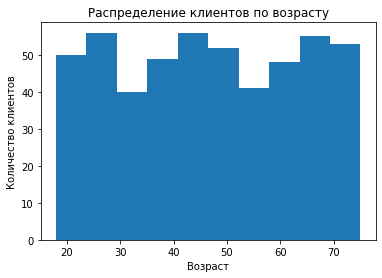

In [4]:


plt.hist([users['age']])
plt.title('Распределение клиентов по возрасту')             
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')         
plt.show()


Никаких особенных артефактов не обнаружено, идём дальше

### Замена типа данных <a id="step2.1"></a>   
</div>  

Заменим тип данных у таких столбцов как `'call_date', 'session_date' и т.д.` с `object` на `datetime`

In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Узнаем количество звонков, длительность которых равна 0. Оценим, ошибки ли это или пропущенные звонки.

In [6]:
calls.loc[calls['duration'] == 0, 'duration'].value_counts()[0]

39613

Добавим отдельно столбец месяц, чтобы оценить зависимость количества нулевых звонков с помощью графика

In [7]:
calls['month'] = calls['call_date'].dt.month

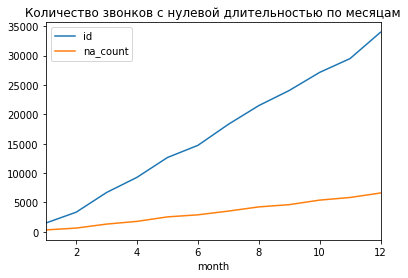

In [8]:
calls.loc[calls['duration'] == 0, 'na_count'] = 1
na_calls = calls.pivot_table(index='month', values=['id', 'na_count'], aggfunc='count')

na_calls.plot(title = 'Количество звонков с нулевой длительностью по месяцам') 
na_calls['na_ratio'] = na_calls['na_count'] / na_calls['id']

Как видно из графика выше (в частности по линиям `'id'` и `'na_count'`) количество нулевых звонков подчиняется почти линейному закону, откуда можно сделать вывод, что такие звонки - это систематичное явление. Поэтому округлим все такие значения в бОльшую сторону с помощью метода `ceil` библиотеки NumPy. 

In [9]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.loc[calls['duration'] == 0, 'duration'] = 1

In [10]:
#Проверим наш датасет
display(calls)

,id,call_date,duration,user_id,month,na_count
0,1000_0,2018-07-25,1.0,1000,7,1.0
1,1000_1,2018-08-17,1.0,1000,8,1.0
2,1000_2,2018-06-11,3.0,1000,6,NaN
3,1000_3,2018-09-21,14.0,1000,9,NaN
4,1000_4,2018-12-15,6.0,1000,12,NaN
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12,NaN
202603,1499_216,2018-10-18,19.0,1499,10,NaN
202604,1499_217,2018-11-10,11.0,1499,11,NaN
202605,1499_218,2018-10-06,5.0,1499,10,NaN


Проделаем аналогичную работу с данными об интернет-сессиях

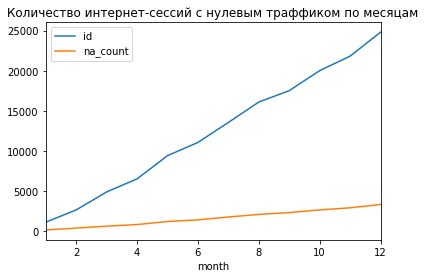

In [11]:
internet['month'] = internet['session_date'].dt.month
internet.loc[internet['mb_used'] == 0, 'na_count'] = 1
na_internet = internet.pivot_table(index='month', values=['id', 'na_count'], aggfunc='count')

na_internet.plot(title = 'Количество интернет-сессий с нулевым траффиком по месяцам') 
na_internet['na_ratio'] = na_internet['na_count'] / na_internet['id']

Видим абсолютно аналогичную картину, поэтому также округляем в большую сторону

In [12]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.loc[internet['mb_used'] == 0, 'mb_used'] = 1
#Проверим наш датасет
display(internet)

,id,mb_used,session_date,user_id,month,na_count
0,1000_0,113.0,2018-11-25,1000,11,NaN
1,1000_1,1053.0,2018-09-07,1000,9,NaN
2,1000_2,1198.0,2018-06-25,1000,6,NaN
3,1000_3,551.0,2018-08-22,1000,8,NaN
4,1000_4,303.0,2018-09-24,1000,9,NaN
...,...,...,...,...,...,...
149391,1499_152,319.0,2018-10-03,1499,10,NaN
149392,1499_153,491.0,2018-12-14,1499,12,NaN
149393,1499_154,1.0,2018-10-27,1499,10,1.0
149394,1499_155,1247.0,2018-11-26,1499,11,NaN


### Вывод<a id="step2.2"></a>   
</div>    

В целом датасет не имеет большого количество ошибок или пропущенных значений.
Некоторые столбцы были переведы в формат datetime для дальнейшего удобства работы с ними.   

  
В дальнейшем, при объединении данных, необходимо будет внимательно смотреть за количеством пропусков, чтобы не допустить ошибку и не испортить датасет.   

  
Нулевые значения в количестве минут, сообщений и трафика интернет-сессий, были проанализированы на предмет их случайного или систематического появления. Так как был доказан 2 вариант, все значения были округлены в большую сторону с учётом политики оператора.   


### Шаг 3. Добавление расчётных данных для каждого пользователя <a id="step3"></a>   
</div>  

Для каждого пользователя необходимо найти:
1. Количество сделанных звонков и израсходованных минут разговора по месяцам;
2. Количество отправленных сообщений по месяцам;
3. Объем израсходованного интернет-трафика по месяцам;
4. Помесячную выручку с каждого пользователя (с учётом вычитания бесплатного лимит из суммарного количества звонков, сообщений и интернет-трафика; и умножения остатка на значение из тарифного плана; с прибавлением абонентской платы, соответствующей тарифному плану).

Перед подсчётом необходимо создать столбец, в котором точно будет уникальное значение.  
Такой уникальный идентификатор можно собрать из имени и фамилии пользователя, возраста и города проживания 

In [13]:
users['unique_name'] = users['first_name'] + users['last_name'] + str(users['age']) + users['city']

Создаём сводную таблицу по звонкам

In [14]:
# Cоздаем временную переменную calls_temp, которая объединяет датасеты calls и users
calls_temp = calls.merge(users, on='user_id', how='inner')

# Группируем сводную таблицу
calls_grouped = calls_temp.pivot_table(values=['unique_name', 'duration'], 
                    index=['user_id', 'month'], 
                    aggfunc={'unique_name': 'count', 'duration': 'sum'})

# Заменяем названия столбцов
calls_grouped.columns = ['duration', 'calls']

# Выведем последние 10 значений сгрупированной таблицы
display(calls_grouped.tail(10))

duration  calls
user_id month                 
1497    11        387.0     64
        12        558.0     71
1498    7         178.0     23
        8         414.0     57
        9         477.0     59
        10        258.0     41
1499    9          71.0      9
        10        473.0     68
        11        624.0     74
        12        505.0     69

Аналогично создаём таблицы по сообщениям и интернет-сессиям

In [15]:
# Сводная таблица по сообщениям
messages['month'] = messages['message_date'].dt.month
messages_temp = messages.merge(users, on='user_id', how='inner')
messages_grouped = messages_temp.pivot_table(values='unique_name', 
                    index=['user_id', 'month'], 
                    aggfunc={'unique_name': 'count'})
messages_grouped.columns = ['messages']
display(messages_grouped.tail(10))
print()

# Сводная таблица по интернет-сессиям
internet['month'] = internet['session_date'].dt.month
internet_temp = internet.merge(users, on='user_id', how='inner')
internet_grouped = internet_temp.pivot_table(values='mb_used', 
                    index=['user_id', 'month'], 
                    aggfunc={'mb_used': 'sum'})
internet_grouped.columns = ['mb_used']
display(internet_grouped.tail(10))


messages
user_id month          
1497    11           14
        12           17
1498    7            20
        8            62
        9            44
        10           42
1499    9            11
        10           48
        11           59
        12           66

mb_used
user_id month         
1497    11     14180.0
        12     19946.0
1498    7       7488.0
        8      24279.0
        9      22186.0
        10     20614.0
1499    9       1849.0
        10     17824.0
        11     17994.0
        12     13082.0

**Объединяем получившиеся сводные таблицы в одну**

In [16]:
# Соберём сводные таблицы с помощью метода reduce из модуля functools.
all_data = [calls_grouped, messages_grouped, internet_grouped]
all_data_grouped = reduce(lambda left,right: pd.merge(left, right, on=['user_id', 'month'], how='outer'), all_data)
display(all_data_grouped.head(25))

duration  calls  messages  mb_used
user_id month                                    
1000    5         164.0   22.0      22.0   2257.0
        6         187.0   43.0      60.0  23262.0
        7         346.0   47.0      75.0  14017.0
        8         418.0   52.0      81.0  14072.0
        9         478.0   58.0      57.0  14583.0
        10        363.0   57.0      73.0  14717.0
        11        344.0   43.0      58.0  14769.0
        12        341.0   46.0      70.0   9829.0
1001    11        444.0   59.0       NaN  18460.0
        12        430.0   63.0       NaN  14059.0
1002    6         118.0   15.0       4.0  10878.0
        7         219.0   26.0      11.0  17615.0
        8         294.0   42.0      13.0  20357.0
        9         217.0   36.0       4.0  16724.0
        10        221.0   33.0      10.0  13913.0
        11        250.0   32.0      16.0  18621.0
        12        242.0   33.0      12.0  18147.0
1003    8         392.0   55.0      37.0   8572.0
        9         990.0  134.0      91.0  12479.0
        10        866.0  108.0      83.0  14779.0
        11        844.0  115.0      94.0  11369.0
        12        822.0  108.0      75.0  10132.0
1004    5          37.0    9.0      95.0  13415.0
        6         177.0   31.0     134.0  17621.0
        7         137.0   22.0     181.0  22246.0

Проверим пропуски в получившейся таблице

In [17]:
all_data_grouped.isnull().sum()

duration     40
calls        40
messages    497
mb_used      11
dtype: int64

У пропусков есть логика, есть 40 строк с пропущенными звонками и, что cправедливо, нулевой длительностью.  
Для дальнейших подсчётов помесячной выручки нам необходимо заменить пропущенные значения на нули. 

In [18]:
all_data_grouped.loc[all_data_grouped['duration'].isna(), 'duration'] = 0
all_data_grouped.loc[all_data_grouped['messages'].isna(), 'messages'] = 0
all_data_grouped.loc[all_data_grouped['mb_used'].isna(), 'mb_used'] = 0

Добавим в таблицу название тарифа, учитывая иную нумерацию пользователей в users

In [19]:
for user in all_data_grouped.index:
    all_data_grouped.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

# Проверим все ли получили свой тариф    

all_data_grouped['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

Создадим функцию, которая будет подсчитывать выручку с каждого пользователя, с учётом заданных условий

In [20]:
def proceed(row):
    messages = row['messages']
    mb_used = row['mb_used']
    tariff = row['tariff']
    duration = row['duration']
    calls = row['calls']
    
    if tariff == 'smart':
        extra_duration = duration - tariffs.loc[0, 'minutes_included']
        extra_mb = mb_used - tariffs.loc[0, 'mb_per_month_included']
        extra_messages = messages - tariffs.loc[0, 'messages_included'] 
        
        if extra_duration < 0: 
            extra_duration = 0
        if extra_mb < 0: 
            extra_mb = 0
        if extra_messages < 0: 
            extra_messages = 0        

        return (tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                (tariffs.loc[0, 'rub_per_gb'] / 1024) * extra_mb + 
                tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                tariffs.loc[0, 'rub_monthly_fee']
                ) 
    
    else:
        extra_duration = duration - tariffs.loc[1, 'minutes_included']
        extra_mb = mb_used - tariffs.loc[1, 'mb_per_month_included']
        extra_messages = messages - tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: 
            extra_duration = 0
        if extra_mb < 0: 
            extra_mb = 0
        if extra_messages < 0: 
            extra_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                (tariffs.loc[1, 'rub_per_gb'] / 1024) * extra_mb + 
                tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                tariffs.loc[1, 'rub_monthly_fee']
                )
    
    

Добавим с помощью функции новый столбец `'proceeds'`


In [21]:
all_data_grouped['proceed'] = all_data_grouped.apply(proceed, axis=1)
all_data_grouped['proceed'] = all_data_grouped['proceed'].apply(np.around)
all_data_grouped.head(25)

duration  calls  messages  mb_used tariff  proceed
user_id month                                                    
1000    5         164.0   22.0      22.0   2257.0  ultra   1950.0
        6         187.0   43.0      60.0  23262.0  ultra   1950.0
        7         346.0   47.0      75.0  14017.0  ultra   1950.0
        8         418.0   52.0      81.0  14072.0  ultra   1950.0
        9         478.0   58.0      57.0  14583.0  ultra   1950.0
        10        363.0   57.0      73.0  14717.0  ultra   1950.0
        11        344.0   43.0      58.0  14769.0  ultra   1950.0
        12        341.0   46.0      70.0   9829.0  ultra   1950.0
1001    11        444.0   59.0       0.0  18460.0  smart   1155.0
        12        430.0   63.0       0.0  14059.0  smart    550.0
1002    6         118.0   15.0       4.0  10878.0  smart    550.0
        7         219.0   26.0      11.0  17615.0  smart    990.0
        8         294.0   42.0      13.0  20357.0  smart   1526.0
        9         217.0   36.0       4.0  16724.0  smart    816.0
        10        221.0   33.0      10.0  13913.0  smart    550.0
        11        250.0   32.0      16.0  18621.0  smart   1187.0
        12        242.0   33.0      12.0  18147.0  smart   1094.0
1003    8         392.0   55.0      37.0   8572.0  ultra   1950.0
        9         990.0  134.0      91.0  12479.0  ultra   1950.0
        10        866.0  108.0      83.0  14779.0  ultra   1950.0
        11        844.0  115.0      94.0  11369.0  ultra   1950.0
        12        822.0  108.0      75.0  10132.0  ultra   1950.0
1004    5          37.0    9.0      95.0  13415.0  ultra   1950.0
        6         177.0   31.0     134.0  17621.0  ultra   1950.0
        7         137.0   22.0     181.0  22246.0  ultra   1950.0

In [22]:
# Проверим, нет ли артефактов

all_data_grouped['proceed'].describe()

count    3214.000000
mean     1499.404480
std       787.010652
min       550.000000
25%       713.500000
50%      1591.000000
75%      1950.000000
max      6768.000000
Name: proceed, dtype: float64

### Вывод <a id="step3.1"></a>   
</div>  

Таким образом используя уникальный идентификатор мы добавили расчётные значения и создали общую таблицу, которую в дальнейшем сможем использовать для анализа.  

  
Кроме того, мы подсчитали выручку для каждого пользователя по месяцам, что также пригодится нам в дальнейшем исследовании.

### Шаг 4. Анализ данных и проверка гипотез<a id="step4"></a>   
</div> 



Найдём средние значения использованных минут, сообщений и интернет-сессий в месяц для каждого пользователя

In [23]:
all_data_grouped_medians = (
    all_data_grouped.pivot_table(index='user_id',
    values=['duration', 'messages', 'mb_used', 'proceed'],
    aggfunc='median').pivot_table(index='user_id', 
                      values=['duration', 'messages', 'mb_used', 'proceed'], 
                      aggfunc='median'))

for user_id in users['user_id']:
    all_data_grouped_medians.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']
all_data_grouped_medians.head(15)

,duration,mb_used,messages,proceed,tariff
user_id,,,,,
1000,345.0,14327.5,65.0,1950.0,ultra
1001,437.0,16259.5,0.0,852.5,smart
1002,221.0,17615.0,11.0,990.0,smart
1003,844.0,11369.0,83.0,1950.0,ultra
1004,136.5,17831.0,154.5,1950.0,ultra
1005,609.5,7846.5,49.0,884.5,smart
1006,365.0,15554.0,0.0,588.0,smart
1007,490.0,14451.0,26.0,882.0,smart
1008,350.0,13243.0,56.0,568.0,smart


С помощью библиотеки NumPy найдем медианы, дисперсию и стандартное отклонение для `all_data_grouped_medians`

In [24]:
all_data_grouped_medians.dropna(subset=['duration'], inplace=True)
stat = all_data_grouped_medians.pivot_table(index=['tariff'], values=['duration', 'mb_used', 'messages'], 
                    aggfunc={'duration': [np.median, np.var, np.std], 
                             'mb_used': [np.median, np.var, np.std], 
                             'messages': [np.median, np.var, np.std]})
stat

duration                             mb_used               \
         median         std           var    median          std   
tariff                                                             
smart     453.0  164.614327  27097.876586  16955.00  4181.498288   
ultra     550.5  311.491491  97026.949014  19751.75  8901.975727   

                     messages                          
                 var   median        std          var  
tariff                                                 
smart   1.748493e+07     28.5  28.010653   784.596662  
ultra   7.924517e+07     47.5  49.236809  2424.263318

Построим графики ящиков с усами для полученной таблицы

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


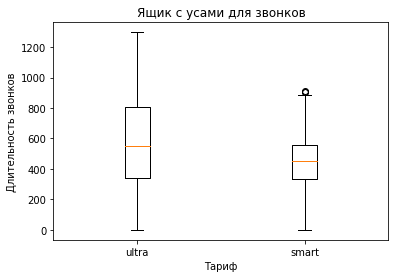

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


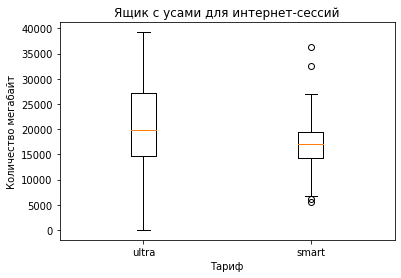

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


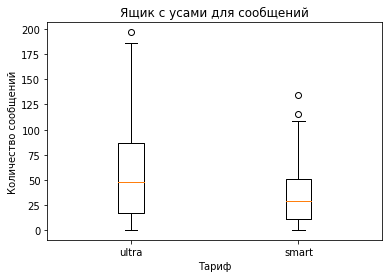

In [25]:
for column in ['duration', 'mb_used', 'messages']:
    
    plt.boxplot([all_data_grouped_medians.query('tariff == "ultra"')[column],
                 all_data_grouped_medians.query('tariff == "smart"')[column]],
                labels = ['ultra','smart'])
    if column == 'duration':
            plt.title('Ящик с усами для звонков')
            plt.xlabel('Тариф')
            plt.ylabel('Длительность звонков')
    if column == 'mb_used':
            plt.title('Ящик с усами для интернет-сессий')
            plt.xlabel('Тариф')
            plt.ylabel('Количество мегабайт')   
    if column == 'messages':
            plt.title('Ящик с усами для сообщений')
            plt.xlabel('Тариф')
            plt.ylabel('Количество сообщений') 
    plt.show()

Как видно из графиков, все исследуемые показатели имеют для тарифа **Ультра** бОльшую дисперсию, чем для тарифа **Смарт**. Для тарифа **Смарт** также характерно наличие большего числа выбросов. 

Построим гистрограммы для исследуемых показателей

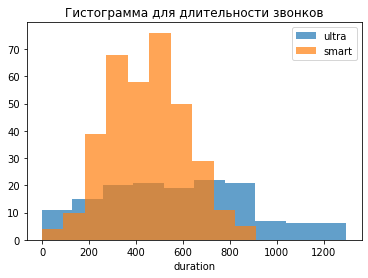

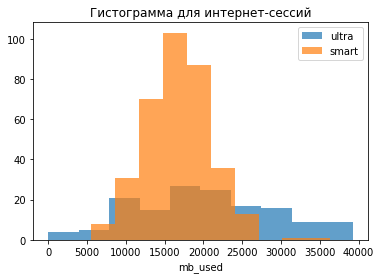

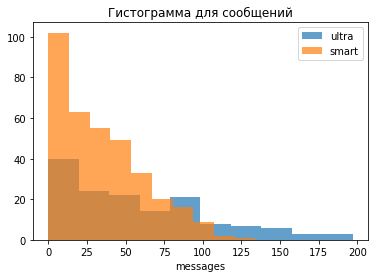

In [26]:
for column in ['duration', 'mb_used', 'messages']:
    
    plt.hist([all_data_grouped_medians.query('tariff == "ultra"')[column]],alpha = 0.7, label = 'ultra')
    plt.hist([all_data_grouped_medians.query('tariff == "smart"')[column]],alpha = 0.7, label = 'smart')
    plt.xlabel(column)
    plt.legend()
             
    if column == 'duration':
            plt.title('Гистограмма для длительности звонков')


    if column == 'mb_used':
            plt.title('Гистограмма для интернет-сессий')
  
    if column == 'messages':
            plt.title('Гистограмма для сообщений')

    plt.show()


Text(0.5, 1, 'Распределение выручки по тарифам')

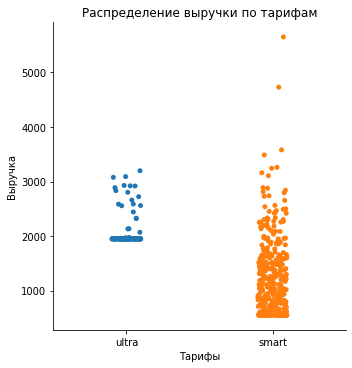

In [27]:
sns.catplot(x="tariff", y='proceed', data=all_data_grouped_medians)
plt.xlabel('Тарифы')
plt.ylabel('Выручка')
plt.title('Распределение выручки по тарифам')


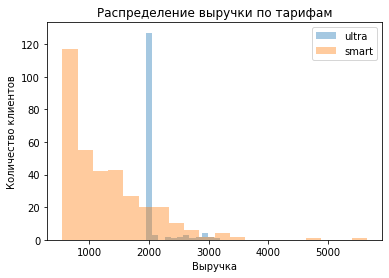

In [56]:
for tariff in ['ultra', 'smart']:
    sns.distplot(all_data_grouped_medians.query('tariff == @tariff')['proceed'], kde=False)
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов')
plt.title('Распределение выручки по тарифам')

plt.legend(['ultra', 'smart'])

### Вывод к анализу данных  <a id="step4.1"></a>   
</div>

По гистрограммам ещё более заметно, что дисперсия по тарифу **Ультра** больше, чем у **Смарта** по всем исследуемым показателям.  
  
   
   
Можно обратить внимание на то, что пользователи с более дорогим тарифом **Ультра** распределены по гистограммам достаточно равномерно. Они используют столько пакетов, сколько им нужно. По гистограммам незаметно стремление к выбору всего лимита пакетов. И заметно, что пакета услуг пользователям хватает.

  
Совершенно иначе выглядят гистограммы для тарифа **Смарт**. Пиковые точки (с небольшими колебаниями в сторону увеличения) трат совпадают со включенными в пакет услуг по тарифу (500 минут разговора и 15ГБ мобильного интернета). То есть пользователи этого тарифа стараются не переходить лимиты тарифного плана, хотя часто им это не удаётся.

  
Отдельно можно обратить внимание на тот факт, что сообщения не пользуются у абонентов большой популярностью, это подтверждается и современными реалиями: большинство пользователей использует мессенджеры (то есть интернет-трафик), поэтому смски постепенно "умирают". 

  
Гистограммы для длительности звонков и интернет-сессий напоминают распределение Гаусса, что также указывает на то, что наше исследование идёт в верном направлении. 


### Проверка гипотезы "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" <a id="step4.2"></a>   
</div>


Нулевая гипотеза H<sub>0</sub> - средняя выручка пользователей тарифа **Ультра** равна средней выручке пользователей тарифа **Смарт**.  
Альтернативная гипотеза H<sub>1</sub> - средняя выручка пользователей тарифов **Ультра** и **Смарт** различаются.

In [55]:
ultra = all_data_grouped.query('tariff == "ultra"')['proceed']
smart = all_data_grouped.query('tariff == "smart"')['proceed']
print('Дисперсия для тарифа Ультра:', np.var(ultra))
print('Дисперсия для тарифа Смарт:', np.var(smart))
alpha = 0.05

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия для тарифа Ультра: 126919.15285629622
Дисперсия для тарифа Смарт: 636060.6723308176
p-значение: 2.4920695901828333e-281
Отвергаем нулевую гипотезу


Посмотрим на живые значения выручки для каждого тарифа

In [30]:
all_data_grouped.pivot_table(index='tariff', values='proceed', aggfunc='median')

,proceed
tariff,
smart,988.0
ultra,1950.0


Построим ящик с усами

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


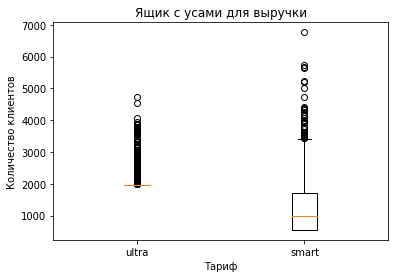

In [58]:
plt.boxplot([all_data_grouped.query('tariff == "ultra"')['proceed'],
                 all_data_grouped.query('tariff == "smart"')['proceed']],
                labels = ['ultra','smart'])
plt.title('Ящик с усами для выручки')
plt.xlabel('Тариф')
plt.ylabel('Количество клиентов')   
plt.show()

### Вывод к первой гипотезе <a id="step4.3"></a>   
</div>


В целом, и из медианных значений было очевидно понятно, что нулевая гипотеза может быть только отвергнута. 

Пользователям тарифа "Смарт" не хватает стандартного пакета, поэтому они постоянно используют услуги сверх тарифного плана. 

  
Таким образом с высокой вероятностью (около 99%) можно заявить, что средняя выручка по двум тарифам различается.

### Проверка гипотезы "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" <a id="step4.4"></a>   
</div>

Нулевая гипотеза H<sub>0</sub> - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.  
Альтернативная гипотеза H<sub>1</sub> - средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

Для ответа на эту гипотезу нам потребуется создать две переменные, в которые мы распределим жителей Москвы и других городов.

In [53]:
for user in all_data_grouped.index:
    all_data_grouped.loc[user, 'city'] = users.loc[user[0]-1000, 'city']

moscow = all_data_grouped.query('city == "Москва"')['proceed']
others = all_data_grouped.query('city != "Москва"')['proceed']
print('Стандартное отклонение для Москвы:', np.std(moscow))
print('Стандартное отклонение для Регионов:', np.std(others))
print('Дисперсия для Москвы:', np.var(moscow))
print('Дисперсия для Регионов:', np.var(others))

Стандартное отклонение для Москвы: 740.4235851248064
Стандартное отклонение для Регионов: 797.3414015661582
Дисперсия для Москвы: 548227.0854090715
Дисперсия для Регионов: 635753.3106514855


In [37]:
alpha = 0.05

results = st.ttest_ind(
    moscow, 
    others, 
    equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5030733613698801
Не получилось отвергнуть нулевую гипотезу


Для проверки расчётами добавим еще одну категоризацию (Москва/Регион).

In [34]:
def region(city):
    if city == 'Москва': 
        return 'Москва'
    else: 
        return 'Регион'
    
all_data_grouped['region'] = all_data_grouped['city'].apply(region)

# Проверяем работу функции                         
all_data_grouped.head(12)

duration  calls  messages  mb_used tariff  proceed  \
user_id month                                                       
1000    5         164.0   22.0      22.0   2257.0  ultra   1950.0   
        6         187.0   43.0      60.0  23262.0  ultra   1950.0   
        7         346.0   47.0      75.0  14017.0  ultra   1950.0   
        8         418.0   52.0      81.0  14072.0  ultra   1950.0   
        9         478.0   58.0      57.0  14583.0  ultra   1950.0   
        10        363.0   57.0      73.0  14717.0  ultra   1950.0   
        11        344.0   43.0      58.0  14769.0  ultra   1950.0   
        12        341.0   46.0      70.0   9829.0  ultra   1950.0   
1001    11        444.0   59.0       0.0  18460.0  smart   1155.0   
        12        430.0   63.0       0.0  14059.0  smart    550.0   
1002    6         118.0   15.0       4.0  10878.0  smart    550.0   
        7         219.0   26.0      11.0  17615.0  smart    990.0   

                      city  region  
user_id month                       
1000    5        Краснодар  Регион  
        6        Краснодар  Регион  
        7        Краснодар  Регион  
        8        Краснодар  Регион  
        9        Краснодар  Регион  
        10       Краснодар  Регион  
        11       Краснодар  Регион  
        12       Краснодар  Регион  
1001    11          Москва  Москва  
        12          Москва  Москва  
1002    6      Стерлитамак  Регион  
        7      Стерлитамак  Регион

Строим сводную таблицу для выручки по пользователям Москвы и остальных регионов.


In [35]:
all_data_grouped.pivot_table(index='region', values='proceed', aggfunc=['median']) 

,median
,proceed
region,
Москва,1734.0
Регион,1546.0


Строим графики

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


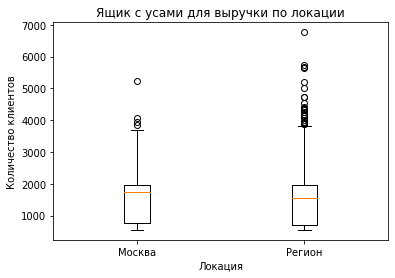

In [62]:
plt.boxplot([all_data_grouped.query('region == "Москва"')['proceed'],
                 all_data_grouped.query('region == "Регион"')['proceed']],
                labels = ['Москва','Регион'])
plt.title('Ящик с усами для выручки по локации')
plt.xlabel('Локация')
plt.ylabel('Количество клиентов')   
plt.show()

### Вывод ко второй гипотезе  <a id="step4.5"></a>   
</div>

В отличии от первой гипотезы, вторую нельзя однозначно опровергнуть. Это подтверждается и медианными данными по выручке.  

Что точно можно сказать, что в презентации "Мегалайну" не стоит говорить, что доходы от московских пользователей и региональных сильно отличаются, так как вероятность ошибки при таком выводе около 50%.

### Шаг 5. Общий вывод  <a id="step5"></a>   
</div>  

Мы получили достаточно "чистый" датасет, хоть и разбросаннный по нескольким файлам.
Принципиально в типе данных мы привели только даты к формату datetime.

Из анализа данных стало понятно, что пользователям тарифа **Смарт** его пакета не хватает, но для них это всё равно выгоднее, чем покупка тарифа **Ультра**. Пользователи же тарифа **Ультра** почти не заботятся о лимитах в пакете по тарифу. 

Больше выручки "Мегалайну" приносит тариф **Ультра**. 1950 рублей против 988 рублей на **Смарте**. То есть мы со своей стороны рекомендуем привлекать клиентов именно на тариф **Ультра**, в том числе мотивируя их тем, что на нём им точно хватит пакета услуг.


  
*Также в рамках исследования было проверено две гипотезы:*
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Первая гипотеза нашла свое подтверждение, вторая напротив, скорее всего была ошибочной.